# DATA 601 Project
    Domestic Movie Analysis from 1972-2016 – Have Domestic Films Gotten Worse? 
    
#### By: 
* Brian Englum
* Tyler Snow
* Joel Wheaton
* Kumar Pasupuleti

> **Purpose:**
> * Many movie fans and film critics believe that U.S. domestic movies have deteriorated in quality over time. Classic blockbusters like "The Godfather," "The Terminator," the Star Wars Episodes IV-VI seem to be a thing of the past. Studios and producers appear to be more interested in making animations; plot-absent, visually entertaining films; and never-ending sequels than making truly original, creative films. 
> * Although viewers and critics may feel this way, little research has been done on the topic.
> * The goal of this project is to use statistical analysis and data science tools to explore this topic and come to a conclusion, one way or another.  

In [6]:
# Imports

import pandas as pd
from Movie import Movie
import csv
import numpy
import plotly.express as px

In [45]:
# Create initial DataFrame from movie_data.csv

df = pd.read_csv('https://raw.githubusercontent.com/tsnow2010/DATA601/refs/heads/main/DATA601_Project1/data/movie_data.csv')
df.sample(1)

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
9377,The Pirates of Penzance,1980.0,"Comedy, Musical",7.9,NaN,NaN,6.1,447,NaN,NaN,movie,"Wilford Leach, Joshua White",United States


## I: Data Cleaning

### Step 1: Restrict years used from 1973 to 2023.  Extreme outliers or no data exists for movies outside these ranges.

In [55]:
df = df[(df['Year'] >= 1973.0) & (df['Year'] <= 2023.0)]

### Step 2: Remove '$' and ',' char's from the GDBOS column values and turns them into <<float>>.

In [131]:
df['Gross Domestic Box Office Sales ($)'] = df['Gross Domestic Box Office Sales ($)'].astype(str).apply(lambda x: ''.join([char for char in x if char not in ['$',',']])).astype(float)
df.sample(1)

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
994,Dinner for Schmucks,2010.0,Comedy,5.9,42,56.0,5.71,"112,178",1 nomination,73026337.0,movie,Jay Roach,United States


### Step 3: Create a DataFrame (df_movie_ratings) that allows data analysis of movie rating metrics.
- Change rating system values from str to float.
- Drop NaN values.

In [57]:
# Changes rating system values (EXCEPT RT) from str to float.

df['IMDB'] = df['IMDB'].astype(float)
df['Metacritic'] = df['Metacritic'].astype(float)
df['TMDB'] = df['TMDB'].astype(float)

# Assigns 'None' to invalid RT ratings, i.e. '31/10' and etc, and removes them in df_movie_ratings.    

def clean_rotten_tom(rtg):
    if type(rtg) is str:
        if '/' in rtg:
            return None
        else: 
            return rtg
    else: 
        return rtg

print("Number of movies BEFORE removing 'bad' RT ratings:", df.shape[0])

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(clean_rotten_tom)
df_RT = df.dropna(subset='Rotten Tomatoes')

print("Number of movies AFTER removing 'bad' RT ratings:", df_RT.shape[0])

df_RT['Rotten Tomatoes'] = df_RT['Rotten Tomatoes'].astype(float)

df.sample(1)

Number of movies BEFORE removing 'bad' RT ratings: 12007
Number of movies AFTER removing 'bad' RT ratings: 9396


/var/folders/yx/32mlh_nx5ns6v1zmf7rs6l8h0000gn/T/ipykernel_4850/2639027596.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
5183,Zorro: The Gay Blade,1981.0,"Action, Adventure, Comedy",6.2,50,52.0,5.9,"4,971",3 wins & 2 nominations,"$11,118,000",movie,Peter Medak,"United States, Mexico"


## II: Data Visualization

### A. Movie Ratings as a Function of Time (in years)

#### Step 1) Group movie data by year and then use aggregation to find averages per metric per year.

In [59]:
# Group by year and find average ratings per metric per year.

df_groupby_year_no_RT = df.groupby("Year").aggregate({
    'IMDB':'mean',
    'Metacritic':'mean',
    'TMDB':'mean'})

df_groupby_year_no_RT = df_groupby_year_no_RT.reset_index()

df_groupby_year_with_RT = df_RT.groupby("Year").aggregate({
    'Rotten Tomatoes': 'mean',
    })

df_groupby_year_with_RT = df_groupby_year_with_RT.reset_index()

#### Step 2) Plot (4) line graphs containing movie ratings per metric as a function of time, in years.

In [ ]:
# Restricts years used from 1973 to 2023.  Extreme outliers or no data exists for movies outside these ranges.

df_group_73_to_23 = df_group[(df_group['Year'] >= 1973.0) & (df_group['Year'] <= 2023.0)]

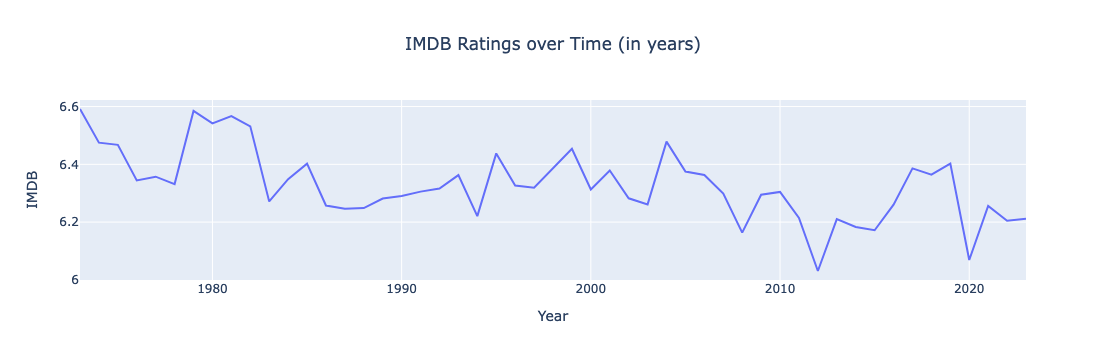

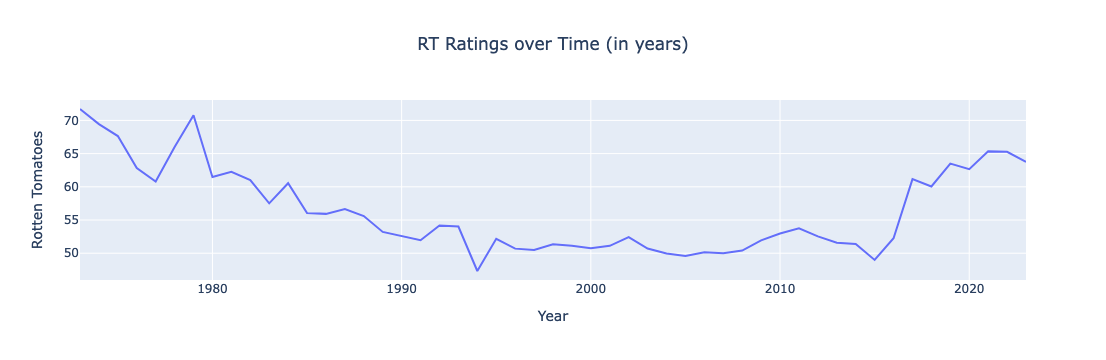

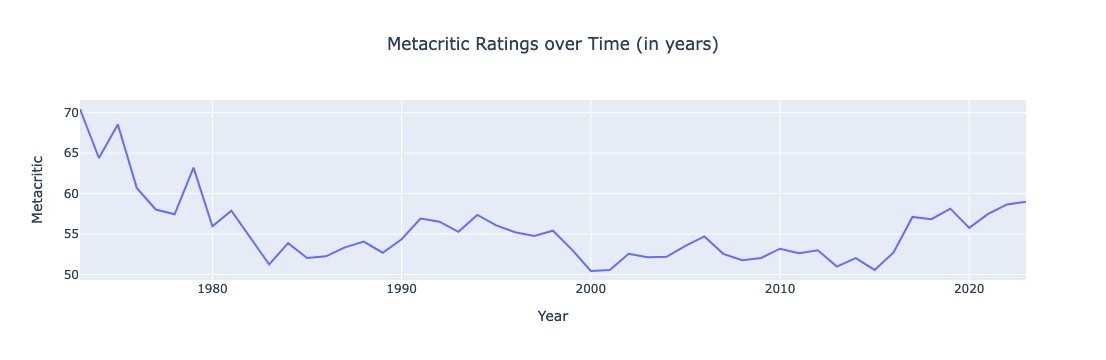

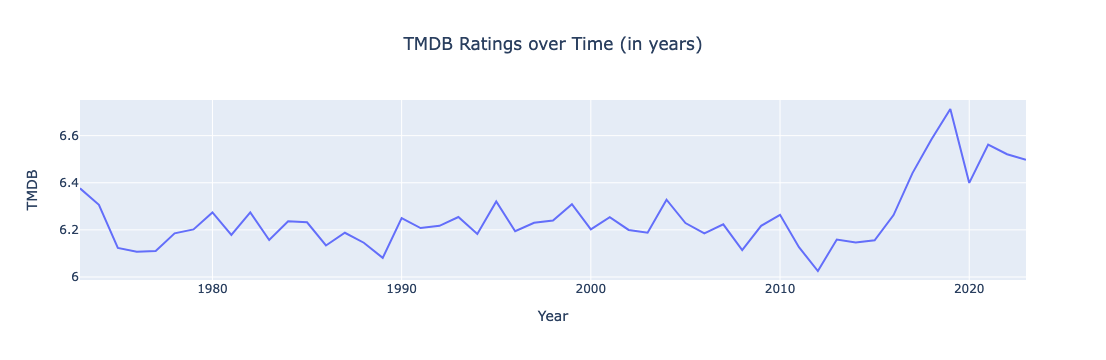

In [61]:
# Plot movie ratings per metric per year.

fig1 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'IMDB',
    title='IMDB Ratings over Time (in years)'
)

fig2 = px.line(
    df_groupby_year_with_RT,
    x = 'Year',
    y = 'Rotten Tomatoes',
    title='RT Ratings over Time (in years)'
)

fig3 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'Metacritic',
    title='Metacritic Ratings over Time (in years)'
)

fig4 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'TMDB',
    title='TMDB Ratings over Time (in years)'
)
fig1.update_layout(title_x = .5)
fig2.update_layout(title_x = .5)
fig3.update_layout(title_x = .5)
fig4.update_layout(title_x = .5)

fig1.show()
fig2.show()
fig3.show()
fig4.show()
    

### B. Movie Ratings **(by genre)** as a Function of Time (in years)

In [72]:
df_genres = df.copy()
print("Number of movies BEFORE removing those without genres:", df_genres['Genre(s)'].shape[0])
df_genres = df_genres.dropna(subset='Genre(s)')
print("Number of movies AFTER removing those without genres:", df_genres['Genre(s)'].shape[0])

df_genres_RT = df_RT.copy()
df_genres_RT = df_genres_RT.dropna(subset='Genre(s)')

Number of movies BEFORE removing those without genres: 12007
Number of movies AFTER removing those without genres: 11526


In [112]:
def classify_genre(genres):
    genres_list = genres.split(',')
    if "Comedy" in genres_list:
        return "Comedy"
    elif "Action" in genres_list:
        return "Action"
    elif "Drama" in genres_list:
        return "Drama"
    else:
        return genres
df_genres['Genre(s)'] = df_genres['Genre(s)'].apply(str).apply(classify_genre)

df_genres_RT['Genre(s)'] = df_genres_RT['Genre(s)'].apply(str).apply(classify_genre)

In [114]:
df_groupby_genres = df_genres.groupby(['Year','Genre(s)']).aggregate(
    {'IMDB': 'mean',
     'Metacritic': 'mean',
     'TMDB': 'mean'
    }
)

df_groupby_genres_RT = df_genres_RT.groupby(['Year','Genre(s)']).aggregate(
    {'Rotten Tomatoes': 'mean'}
)
df_groupby_genres.reset_index().sample(5)

,Year,Genre(s),IMDB,Metacritic,TMDB
6,1974.0,Drama,6.750000,72.375000,6.452794
143,2008.0,None,6.286207,52.978495,6.155895
173,2016.0,Comedy,6.118182,51.363636,6.087727
43,1983.0,None,6.574359,52.153846,6.491361
85,1994.0,Comedy,5.906329,53.186047,5.917130


In [116]:
print(df_genres['Genre(s)'].describe())

print(sum([df_genres[df_genres['Genre(s)'] == "Comedy"].shape[0], 
           df_genres[df_genres['Genre(s)'] == "Action"].shape[0], 
           df_genres[df_genres['Genre(s)'] == "Comedy"].shape[0]]))

count     11526
unique        4
top        None
freq       3951
Name: Genre(s), dtype: object
8479


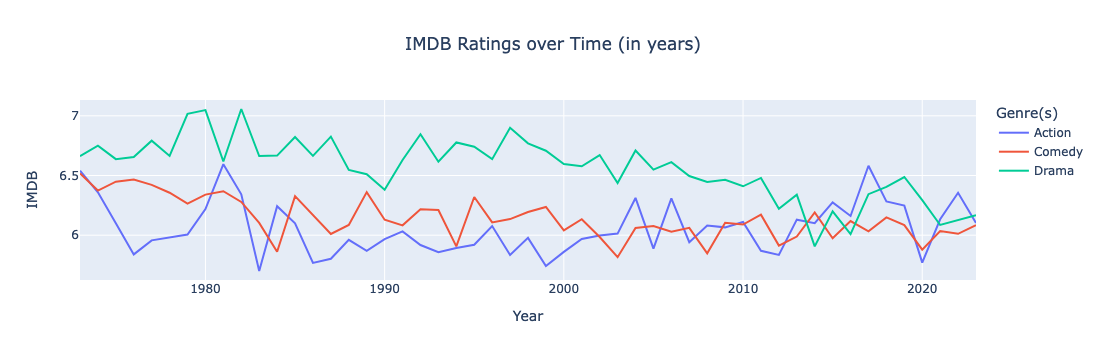

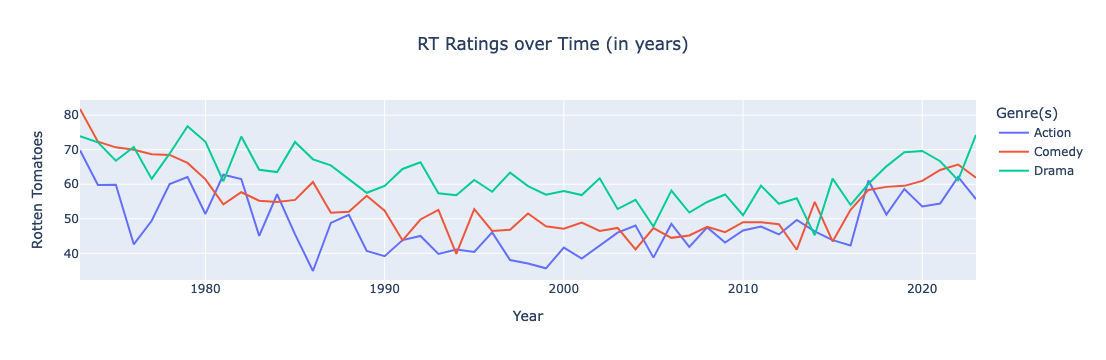

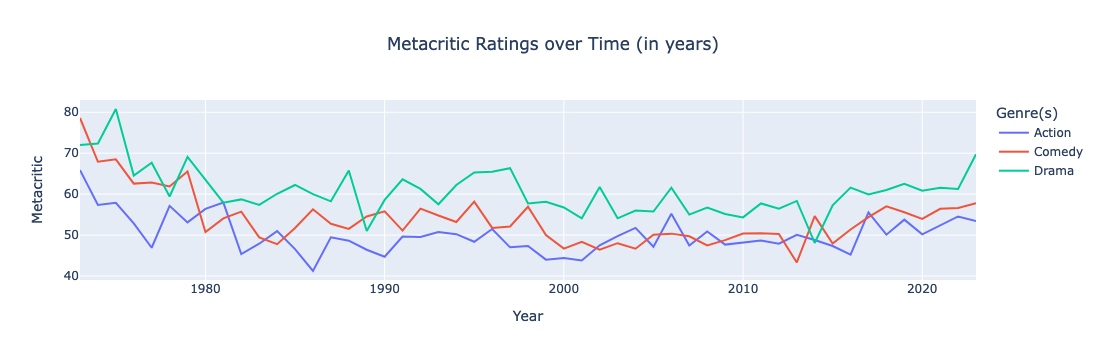

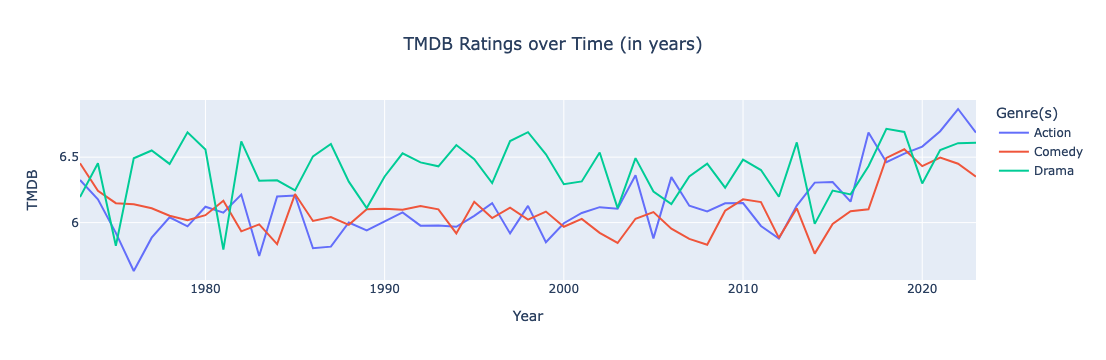

In [102]:
# Plot movie ratings (by genre) per metric per year.

fig1 = px.line(
    df_groupby_genres.reset_index(),
    x = 'Year',
    y = 'IMDB',
    color = 'Genre(s)',
    title='IMDB Ratings over Time (in years)'
)

fig2 = px.line(
     df_groupby_genres_RT.reset_index(),
     x = 'Year',
     y = 'Rotten Tomatoes',
     color = 'Genre(s)',
     title='RT Ratings over Time (in years)'
)

fig3 = px.line(
     df_groupby_genres.reset_index(),
     x = 'Year',
     y = 'Metacritic',
     color = 'Genre(s)',
     title='Metacritic Ratings over Time (in years)'
)

fig4 = px.line(
     df_groupby_genres.reset_index(),
     x = 'Year',
     y = 'TMDB',
     color = 'Genre(s)',
     title='TMDB Ratings over Time (in years)'
)

fig1.update_layout(title_x = .5)
fig2.update_layout(title_x = .5)
fig3.update_layout(title_x = .5)
fig4.update_layout(title_x = .5)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

### C. Total Gross Domestic Box Office Sales (GDBOS) By Year, Adjusted for Inflation

Step 1: Drop all movies that have NaN in GDBOS column.

In [141]:
df_GDBOS = df.dropna(subset=['Gross Domestic Box Office Sales ($)'])

print(f'A total of {df.shape[0]-df_GDBOS.shape[0]} movies were removed.')

A total of 3981 movies were removed.
